# Ensemble Boosting Model
부스팅(Boosting)이란 단순하고 약한 학습기(Weak Learner)들를 결합해서 보다 정확하고 강력한 학습기(Strong Learner)를 만드는 방식.  
정확도가 낮은 하나의 모델을 만들어 추론 시킨뒤, 그 모델의 예측 오류는 두 번째 모델이 보완한다. 이 두 모델을 합치면 처음보다는 정확한 모델이 만들어 진다. 합쳐진 모델의 예측 오류는 다음 모델에서 보완하여 계속 더하는 과정을 반복한다.

- 약한 학습기들은 앞 학습기가 만든 오류를 줄이는 방향으로 학습한다.
- gradient boosting
    - 처음 모델은 y를 예측 두번째 부터는 앞 모델이 만든 오류를 예측 그것을 앞 모델에 업데이트하면 오류를 줄일 수 있다.
    - 그 오류를 update할 때 뺄까 더할까를 gradient descent 방법을 쓴다. 미분해서 나오는 값의 음수를 취해서 적용. 
    - 학습률을 작게하면 update가 조금씩 크면 많이 하게 된다. 그래서 크게하면 학습데이터에 너무 맞아 과대적합 될 수 있다.

# GradientBoosting
- 개별 모델로 Decision Tree 를 사용한다. 
- depth가 깊지 않은 트리를 많이 연결해서 이전 트리의 오차를 보정해 나가는 방식으로 실행한다.
- 오차를 보정할 때 경사하강법(Gradient descent)을 사용한다.
- 얕은 트리를 많이 연결하여 각각의 트리가 데이터의 일부에 대해 예측을 잘 수행하도록 하고 그런 트리들이 모여 전체 성능을 높이는 것이 기본 아이디어.
- 분류와 회귀 둘다 지원하는 모델 (GradientBoostingClassifier, GrandientBoostingRegressor)
- 훈련시간이 많이 걸리고, 트리기반 모델의 특성상 희소한 고차원 데이터에서는 성능이 안 좋은 단점이 있다.

## GradientBoosting 학습 및 추론 프로세스

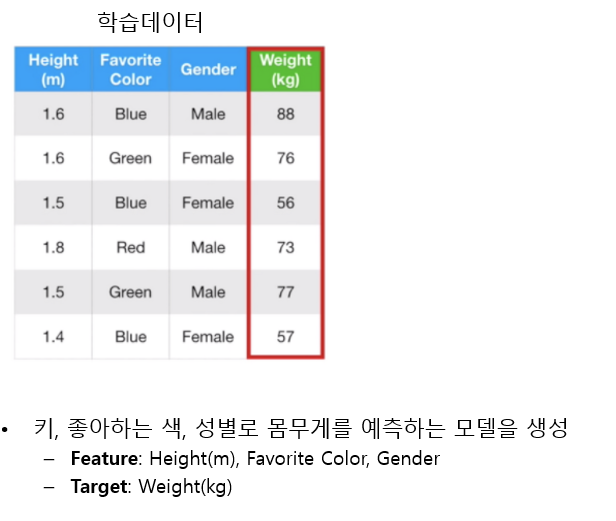

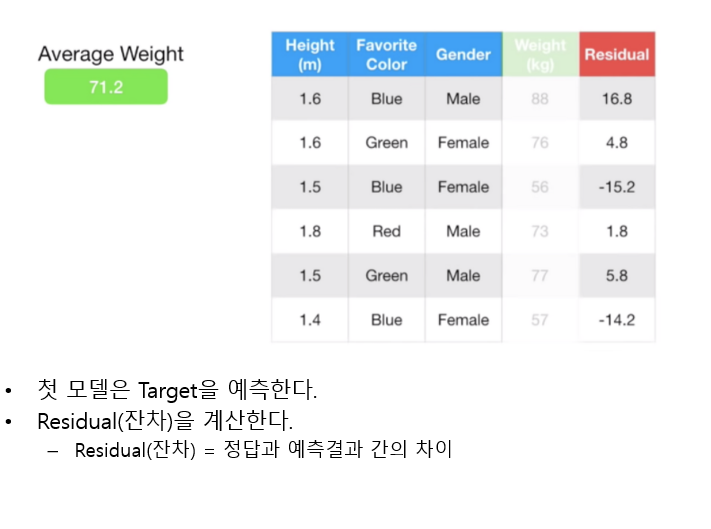

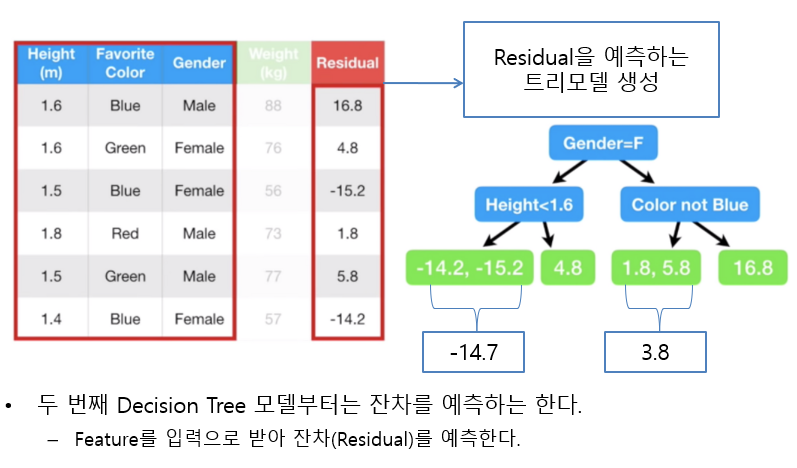

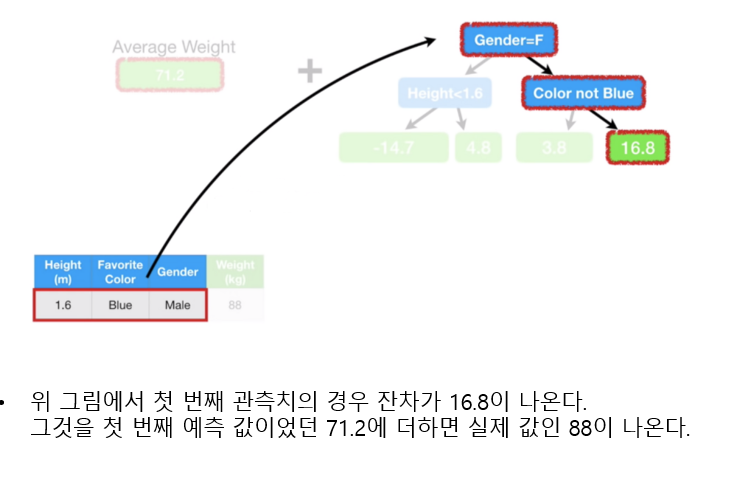

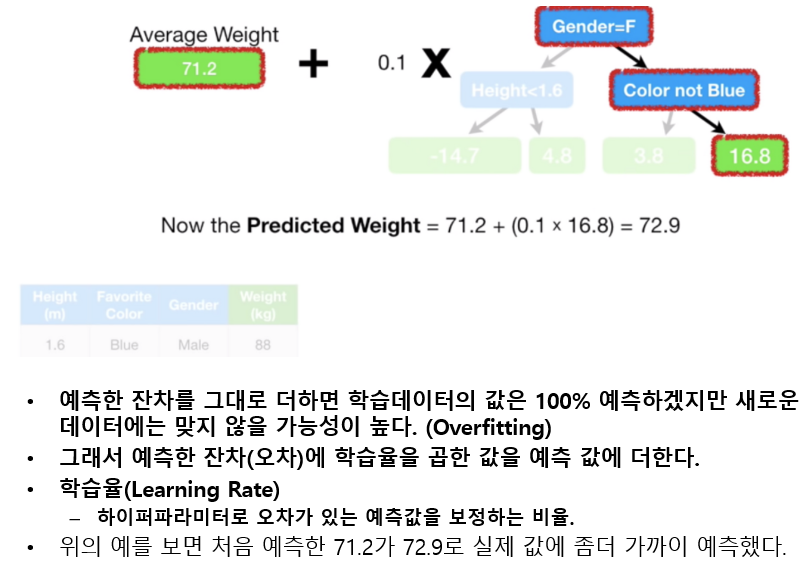

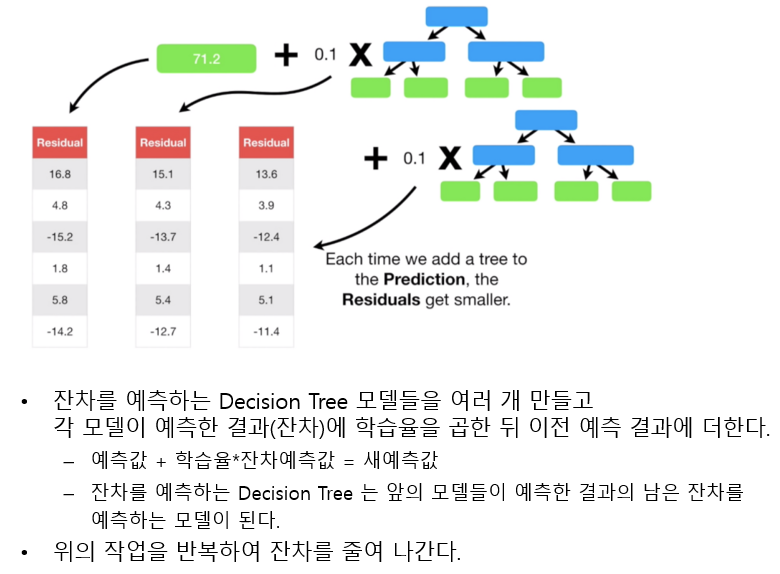

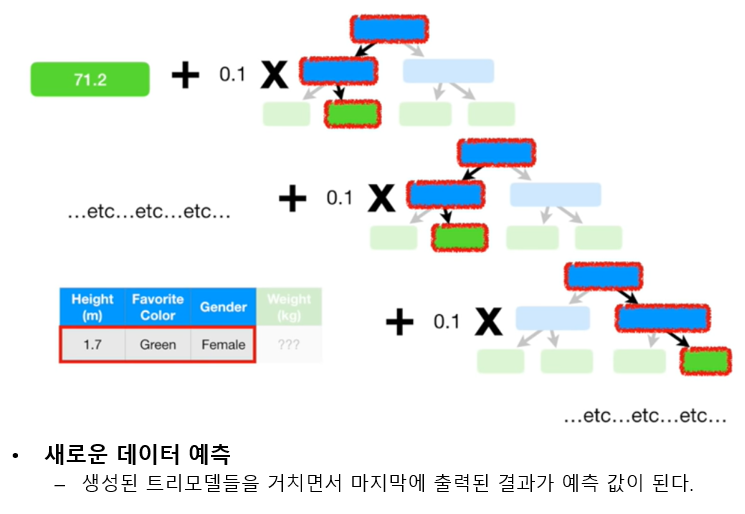

이미지 참조: https://www.youtube.com/watch?v=3CC4N4z3GJc&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=49

### 주요 파라미터
- **Decision Tree 의 가지치기 관련 매개변수**
    - 각각의 decision tree가 복잡한 모델이 되지 않도록 한다. 

- **learning rate**
    - 이전 decision tree의 오차를 얼마나 강하게 보정할 것인지 제어하는 값. 
    - 값이 크면 보정을 강하게 하여 복잡한 모델을 만든다. 학습데이터의 정확도는 올라가지만 과대적합이 날 수있다. 
    - 값을 작게 잡으면 보정을 약하게 하여 모델의 복잡도를 줄인다. 과대적합을 줄일 수 있지만 성능 자체가 낮아질 수있다.
    - 기본값 : 0.1

- **n_estimators**
    - decision tree의 개수 지정. 많을 수록 복잡한 모델이 된다.

- **n_iter_no_change, validation_fraction**
    - validation_fraction에 지정한 비율만큼 n_iter_no_change에 지정한 반복 횟수동안 검증점수가 좋아 지지 않으면 훈련을 조기 종료한다.

- **보통 max_depth를 낮춰 개별 decision tree의 복잡도를 낮춘다. 보통 5가 넘지 않게 설정한다. 그리고 n_estimators를 가용시간, 메모리 한도에 맞춰 크게 설정하고 적절한 learning_rate을 찾는다.**

### 예제

In [35]:
%%writefile util.py

# %%writefile 파일경로 - cell의 내용을 파일로 저장한다. 반드시 첫줄에 작성한다.

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
def print_metrics(y, pred, title=None):
    acc = accuracy_score(y, pred)
    recall = recall_score(y, pred)
    precision = precision_score(y, pred)
    f1 = f1_score(y, pred)   
    
    if title:
        print(title)
    print(f'정확도: {acc}, recall: {recall}, Precision: {precision}, f1점수: {f1}')

Overwriting util.py


##### import

In [36]:
from util import print_metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

##### 위스콘신 유방암 데이터 loading, train/testset 분리

In [37]:
data = load_breast_cancer()
X, y = data['data'], data['target']
# data.data, data.target: Bunch 값 조회시 . 표기법, [] 표기법 둘다 가능.

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [38]:
X.shape

(569, 30)

##### GradientBoostingClassifier 모델 생성, 학습, 평가

In [39]:
GradientBoostingClassifier?

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

# 모델생성 - max_depth=3
gb = GradientBoostingClassifier(random_state=0)
# 학습
gb.fit(X_train, y_train)
# 추론
pred_train = gb.predict(X_train)
pred_test = gb.predict(X_test)
# 평가
print_metrics(y_train, pred_train, title='Train')
print_metrics(y_test, pred_test, title='Test')

Train
정확도: 1.0, recall: 1.0, Precision: 1.0, f1점수: 1.0
Test
정확도: 0.958041958041958, recall: 0.9555555555555556, Precision: 0.9772727272727273, f1점수: 0.9662921348314608


##### 하이퍼파라미터 변경에 따른 성능 비교

In [41]:
# max_depth=1
gb = GradientBoostingClassifier(random_state=0, max_depth=1) #learning_rate: 0.1

gb.fit(X_train, y_train)
pred_train = gb.predict(X_train)
pred_test = gb.predict(X_test)

print_metrics(y_train, pred_train, title='Train')
print_metrics(y_test, pred_test, title='Test')

Train
정확도: 0.9953051643192489, recall: 1.0, Precision: 0.9925650557620818, f1점수: 0.9962686567164178
Test
정확도: 0.965034965034965, recall: 0.9777777777777777, Precision: 0.967032967032967, f1점수: 0.9723756906077348


In [42]:
gb = GradientBoostingClassifier(random_state=0, max_depth=1, 
                                learning_rate=0.01, 
                                n_estimators=1000) #learning_rate 기본값: 0.1 => 0.001 (과소적합)

gb.fit(X_train, y_train)
pred_train = gb.predict(X_train)
pred_test = gb.predict(X_test)

print_metrics(y_train, pred_train, title='Train')
print_metrics(y_test, pred_test, title='Test')

Train
정확도: 0.9953051643192489, recall: 1.0, Precision: 0.9925650557620818, f1점수: 0.9962686567164178
Test
정확도: 0.958041958041958, recall: 0.9666666666666667, Precision: 0.9666666666666667, f1점수: 0.9666666666666667


##### Feature 중요도를 조회

In [43]:
gb.feature_importances_

array([0.        , 0.00151889, 0.        , 0.        , 0.        ,
       0.        , 0.00446665, 0.16350925, 0.        , 0.        ,
       0.00044232, 0.        , 0.        , 0.00377378, 0.00122931,
       0.        , 0.00041146, 0.        , 0.        , 0.        ,
       0.09167029, 0.01931462, 0.30713717, 0.10577961, 0.00404029,
       0.        , 0.00739352, 0.28808604, 0.0012268 , 0.        ])

In [44]:
import pandas as pd
fi = pd.Series(gb.feature_importances_, index=data['feature_names'])
fi.sort_values(ascending=False)

worst perimeter            0.307137
worst concave points       0.288086
mean concave points        0.163509
worst area                 0.105780
worst radius               0.091670
worst texture              0.019315
worst concavity            0.007394
mean concavity             0.004467
worst smoothness           0.004040
area error                 0.003774
mean texture               0.001519
smoothness error           0.001229
worst symmetry             0.001227
radius error               0.000442
concavity error            0.000411
worst compactness          0.000000
fractal dimension error    0.000000
mean radius                0.000000
compactness error          0.000000
symmetry error             0.000000
concave points error       0.000000
perimeter error            0.000000
texture error              0.000000
mean fractal dimension     0.000000
mean symmetry              0.000000
mean compactness           0.000000
mean smoothness            0.000000
mean area                  0

<AxesSubplot:>

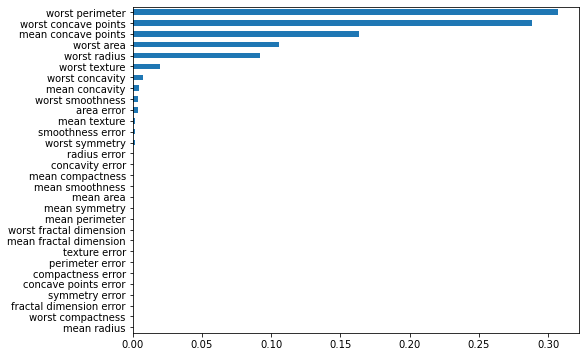

In [45]:
fi.sort_values().plot(kind='barh', figsize=(8,6))

### GridSearchCV 이용해 최적의 하이퍼파라미터 찾기

##### RandomizedSearchCV 생성

In [46]:
6*5*3*4

360

In [47]:
from sklearn.model_selection import RandomizedSearchCV

param = {
    'n_estimators':range(500, 1001, 100),
    'learning_rate':[0.001, 0.05, 0.01, 0.1, 0.5], 
    'max_depth':[1,2,3],
    'subsample':[0.5, 0.7, 0.9, 1] #sampling 비율
}

rs = RandomizedSearchCV(GradientBoostingClassifier(random_state=0),
                        param,
                        cv=4, 
                        n_iter=60, 
                        scoring='accuracy', 
                        n_jobs=-1)

##### 학습, 평가

In [48]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.05, 0.01,
                                                          0.1, 0.5],
                                        'max_depth': [1, 2, 3],
                                        'n_estimators': range(500, 1001, 100),
                                        'subsample': [0.5, 0.7, 0.9, 1]},
                   scoring='accuracy')

##### 결과확인

In [49]:
result_df = pd.DataFrame(rs.cv_results_)

In [50]:
result_df.sort_values('rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
49       2.034355      0.128107         0.003489        0.000500   
29       1.597749      0.018868         0.002494        0.000864   
25       1.821525      0.048408         0.002494        0.000500   
57       2.222160      0.016247         0.002744        0.000433   
42       2.132608      0.023838         0.003502        0.000505   

   param_subsample param_n_estimators param_max_depth param_learning_rate  \
49             0.7               1000               3                 0.1   
29             0.5                800               2                 0.1   
25             0.5                900               2                 0.1   
57             0.7                900               2                0.05   
42             0.5                800               3                0.05   

                                               params  split0_test_score  \
49  {'subsample': 0.7, 'n_estimators': 1000, 'max_...           0.953271   
29  {'subsample': 0.5, 'n_estimators': 800, 'max_d...           0.943925   
25  {'subsample': 0.5, 'n_estimators': 900, 'max_d...           0.953271   
57  {'subsample': 0.7, 'n_estimators': 900, 'max_d...           0.943925   
42  {'subsample': 0.5, 'n_estimators': 800, 'max_d...           0.943925   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
49           0.981308           0.981132           0.981132         0.974211   
29           0.971963           0.981132           0.990566         0.971896   
25           0.971963           0.981132           0.981132         0.971874   
57           0.971963           0.981132           0.981132         0.969538   
42           0.971963           0.981132           0.981132         0.969538   

    std_test_score  rank_test_score  
49        0.012090                1  
29        0.017437                2  
25        0.011374                3  
57        0.015254                4  
42        0.015254                4

In [51]:
rs.best_params_

{'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.1}

In [52]:
rs.best_score_

0.9742108975489332

##### best estimator 조회 및 Test set 최종평가

In [53]:
best_model = rs.best_estimator_
pred_test = best_model.predict(X_test)

In [54]:
print_metrics(y_test, pred_test, "best_model")

best_model
정확도: 0.951048951048951, recall: 0.9555555555555556, Precision: 0.9662921348314607, f1점수: 0.9608938547486034


##### Feature importance

In [55]:
import numpy as np
fi = pd.Series(best_model.feature_importances_, index=data['feature_names'])
fi.sort_values(ascending=False)

worst perimeter            0.430558
mean concave points        0.156076
worst concave points       0.101677
worst radius               0.093673
worst area                 0.056623
worst concavity            0.034179
worst texture              0.025567
mean texture               0.024364
area error                 0.016412
worst smoothness           0.015846
mean concavity             0.011620
radius error               0.005720
concavity error            0.004267
perimeter error            0.003865
texture error              0.003644
mean compactness           0.002104
mean radius                0.001961
mean area                  0.001849
worst compactness          0.001665
mean perimeter             0.001515
mean fractal dimension     0.001363
fractal dimension error    0.001280
symmetry error             0.001135
compactness error          0.000969
worst symmetry             0.000749
concave points error       0.000556
mean symmetry              0.000291
worst fractal dimension    0

<AxesSubplot:>

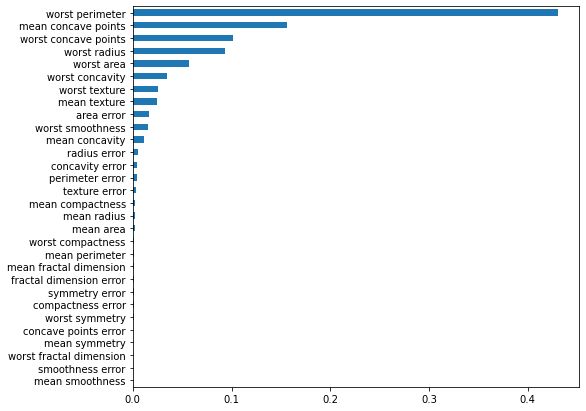

In [56]:
fi.sort_values().plot(kind='barh', figsize=(8,7))

# XGBoost(Extra Gradient Boost)
- https://xgboost.readthedocs.io/ 
- Gradient Boost 알고리즘을 기반으로 개선해서 분산환경에서도 실행할 수 있도록 구현 나온 모델.
- Gradient Boost의 단점인 느린수행시간을 해결하고 과적합을 제어할 수 있는 규제들을 제공하여 성능을 높임.
- 회귀와 분류 모두 지원한다.
- 캐글 경진대회에서 상위에 입상한 데이터 과학자들이 사용한 것을 알려저 유명해짐.
- 두가지 개발 방법
    - [Scikit-learn 래퍼 XGBoost 모듈 사용](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)
    - [파이썬 래퍼 XGBoost 모듈 사용](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.training)
- 설치
``
conda install -y -c anaconda py-xgboost
``

In [57]:
#!conda install -y -c anaconda py-xgboost

## Scikit-learn 래퍼 XGBoost
- XGBoost를 Scikit-learn프레임워크와 연동할 수 있도록 개발됨.
- Scikit-learn의 Estimator들과 동일한 패턴으로 코드를 작성할 수 있다.
- GridSearchCV나 Pipeline 등 Scikit-learn이 제공하는 다양한 유틸리티들을 사용할 수 있다.
- XGBClassifier: 분류
- XGBRegressor : 회귀 

### 주요 매개변수
- learning_rate : 학습률, 보통 0.01 ~ 0.2 사이의 값 사용
- n_estimators : week tree 개수
- Decision Tree관련 하이퍼파라미터들

### 예제

In [58]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=500, learning_rate=0.01, 
                    max_depth=2, random_state=0)

In [59]:
xgb.fit(X_train, y_train)

C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:26:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
pred_train = xgb.predict(X_train)
pred_test = xgb.predict(X_test)

In [61]:
print_metrics(y_train, pred_train, "XGB Train")
print_metrics(y_test, pred_test, 'XGB Test')

XGB Train
정확도: 0.9953051643192489, recall: 0.9962546816479401, Precision: 0.9962546816479401, f1점수: 0.9962546816479401
XGB Test
정확도: 0.951048951048951, recall: 0.9555555555555556, Precision: 0.9662921348314607, f1점수: 0.9608938547486034


##### feature importance

In [62]:
xgb.feature_importances_

array([0.02211769, 0.01399264, 0.        , 0.        , 0.        ,
       0.        , 0.01540333, 0.19148365, 0.01194363, 0.        ,
       0.01203157, 0.03705077, 0.00558028, 0.01618113, 0.        ,
       0.        , 0.        , 0.        , 0.00234199, 0.        ,
       0.07711932, 0.02548871, 0.31771466, 0.05048891, 0.0095574 ,
       0.        , 0.02996699, 0.1506964 , 0.00504087, 0.00580008],
      dtype=float32)

In [64]:
pd.Series(xgb.feature_importances_, index=data.feature_names).sort_values()

smoothness error           0.000000
worst compactness          0.000000
mean perimeter             0.000000
mean area                  0.000000
mean smoothness            0.000000
mean compactness           0.000000
fractal dimension error    0.000000
concave points error       0.000000
mean fractal dimension     0.000000
concavity error            0.000000
compactness error          0.000000
symmetry error             0.002342
worst symmetry             0.005041
perimeter error            0.005580
worst fractal dimension    0.005800
worst smoothness           0.009557
mean symmetry              0.011944
radius error               0.012032
mean texture               0.013993
mean concavity             0.015403
area error                 0.016181
mean radius                0.022118
worst texture              0.025489
worst concavity            0.029967
texture error              0.037051
worst area                 0.050489
worst radius               0.077119
worst concave points       0

<AxesSubplot:>

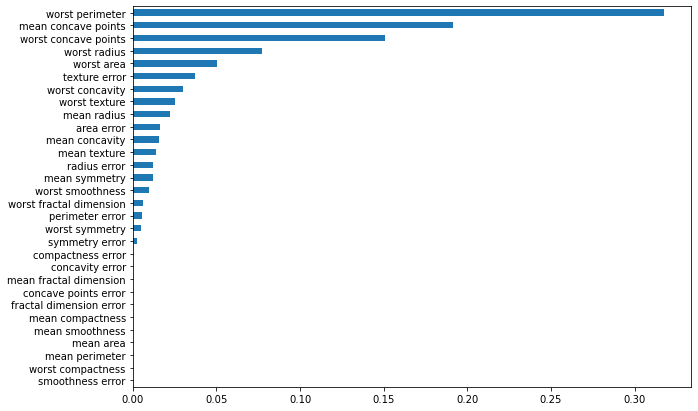

In [65]:
pd.Series(xgb.feature_importances_, index=data.feature_names).sort_values().plot(kind='barh', figsize=(10,7))